**Gold Price Prediction**

Importing libraries

In [ ]:
# Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plotting graphs and chaarts
import seaborn as sns #drawing statistical graphics
%matplotlib inline
#import pandas_profiling as pp
#import pandas_profiling as pf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import seaborn as sns

Dataset

In [ ]:
#Runs after uploading the dataset
! mkdir data
! unzip gold_data.zip  -d data

mkdir: cannot create directory ‘data’: File exists
Archive:  gold_data.zip
  inflating: data/gld_price_data.csv  


In [ ]:
gold_data = pd.read_csv("/content/data/gld_price_data.csv")

Preprocessing and Visualization

In [ ]:
gold_data.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
gold_data.shape

(2290, 6)

In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


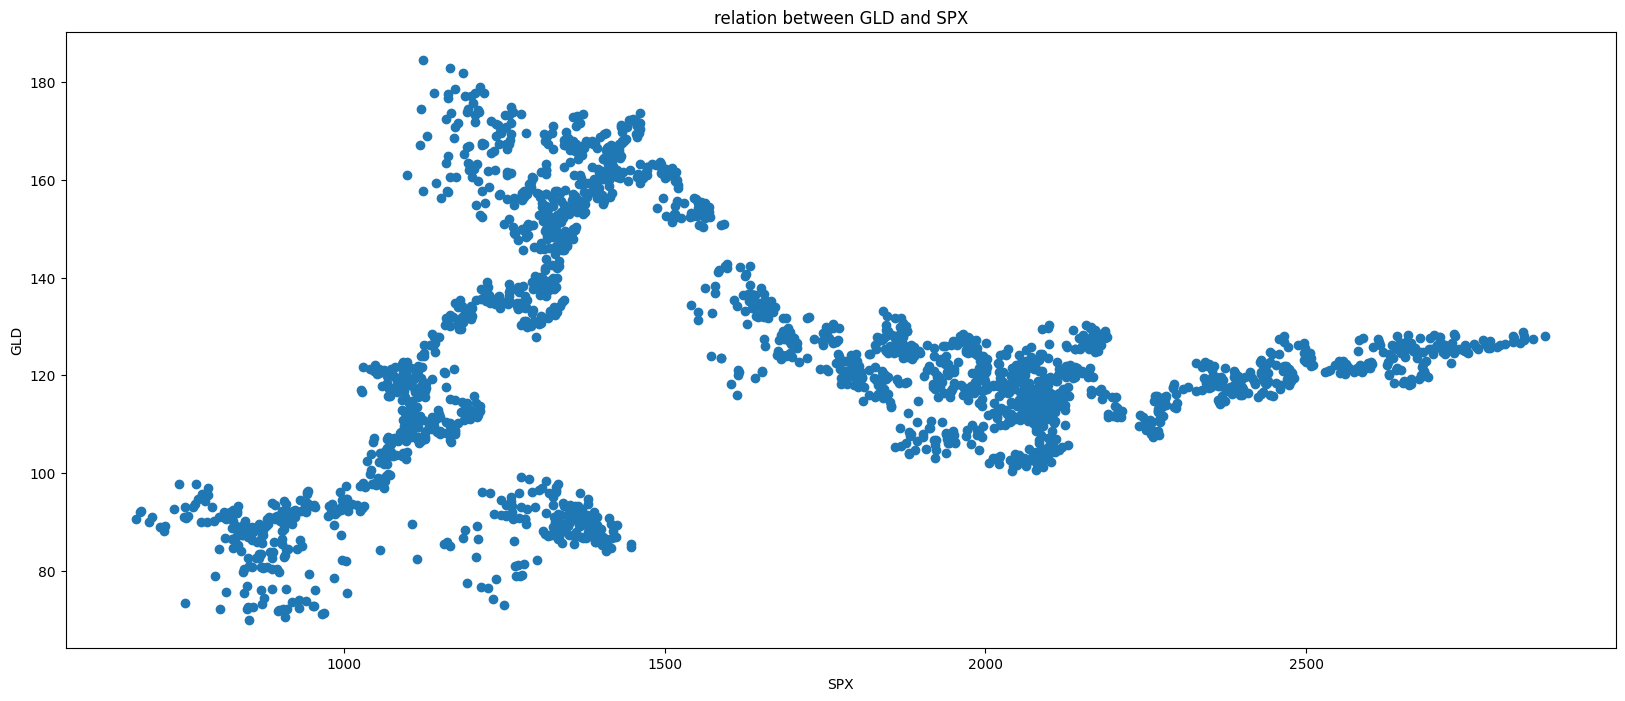

In [ ]:
#Looks like all are normally distributed except USO as it seems to have some outliers, and simirarly SLV too.
fig = plt.figure(figsize =(20,8))

plt.scatter(gold_data['SPX'],gold_data['GLD'])

plt.xlabel('SPX')
plt.ylabel('GLD')
plt.title("relation between GLD and SPX")
plt.show()

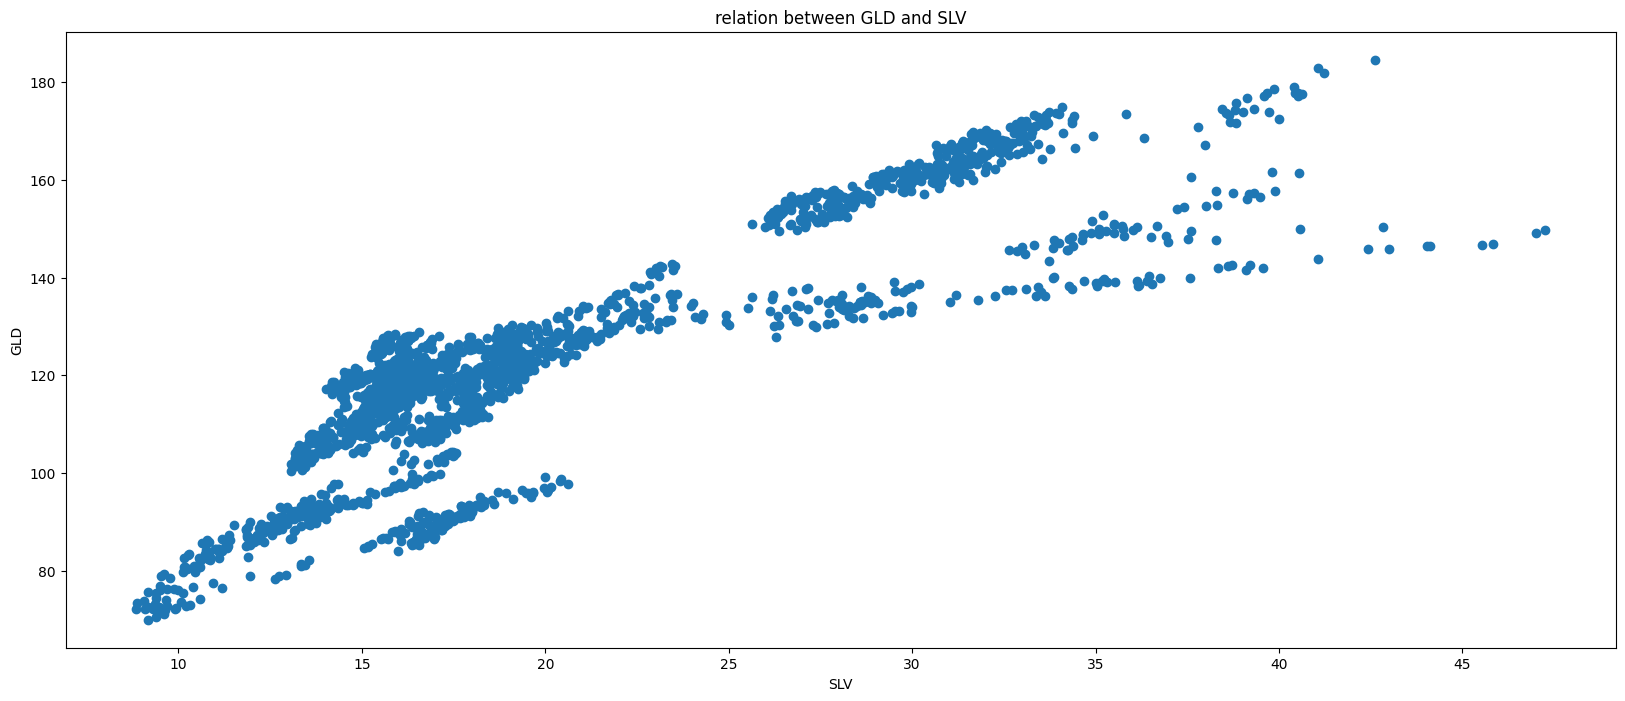

In [ ]:
fig = plt.figure(figsize =(20,8))

plt.scatter(gold_data['SLV'],gold_data['GLD'])

plt.xlabel('SLV')
plt.ylabel('GLD')
plt.title("relation between GLD and SLV")
plt.show()

In [ ]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Training

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [ ]:
#Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
# Training
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
# Prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.5422995   82.0105     115.92600014 127.64660075 120.60080157
 154.72649702 150.0822984  126.19970031 117.43409895 125.93990098
 116.7289007  172.1687013  141.46399861 167.70439864 115.26589981
 117.79500031 137.63300309 170.14950107 159.68910202 157.37579992
 155.21909997 125.29420037 176.6426997  156.92310335 125.25420026
  93.97249969  77.47240026 120.39279974 119.05699926 167.45129976
  87.95380032 125.3810002   91.16210102 117.83990013 121.10099861
 136.53170145 115.46760126 115.18270063 145.68899805 107.27740121
 103.57610224  87.05479783 126.54560014 118.17649997 152.01689893
 119.62579996 108.36149984 108.28309856  93.13320051 127.21879726
  74.80890031 113.60489937 121.16450012 111.23199876 118.76519902
 120.37749921 159.46329934 169.26020098 146.79879663  85.62769848
  94.3711005   86.80609847  90.50249999 119.09880076 126.47230069
 127.61259966 169.06859963 122.30219941 117.14249906  98.82860044
 167.42300174 143.19379888 131.85810299 121.21650229 120.96559943
 119.65970

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, Y_train)
print('Train score', lreg.score(X_train, Y_train))
print('Test score', lreg.score(X_test, Y_test))

Train score 0.8850695972446934
Test score 0.8657886565869237


In [ ]:
y_pred_lr = lreg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred_lr,Y_test)

70.7889007972153

In [ ]:
#XGBoost
from xgboost import XGBRegressor
model_xgbre = XGBRegressor(learning_rate = 0.5 , max_depth = 5, n_estimator = 50)

In [ ]:
model_xgbre.fit(X_train,Y_train)

model_xgbre.score(X_test,Y_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:44:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


0.9875873919889777

In [ ]:
y_pred_xgb = model_xgbre.predict(X_test)

In [ ]:
mean_squared_error(y_pred_xgb,Y_test)

6.546949421574514

The best result is given by XGBoost Regressor with 0.9875873919889777